In [42]:
# Author: Ved P Sharma
# Date: 02/23/2020

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [43]:
# Importing csv files and cleaning data by deleting unwanted columns and deleting rows with N/A values
folderName = 'd:/Users/ved/Data Science/NYC_BLL/'
fileName = 'NYC_Children_under_6_BLL.csv'

df = pd.read_csv(folderName+fileName)
#df

In [44]:
df = df.iloc[:, :19]

In [45]:
#df

In [46]:
old_colnames = df.columns.tolist()
new_colnames = old_colnames[:5] + ['BLL_5', 'BLL_5_notes', 'BLL_10', 'BLL_10_notes', 'BLL_15', 'BLL_15_notes', 
                                   'Tested', 'Tested_notes', 'BLL_5_per1000', 'BLL_5_per1000_notes', 
                                   'BLL_10_per1000', 'BLL_10_per1000_notes', 'BLL_15_per1000', 'BLL_15_per1000_notes']
print(new_colnames)
len(new_colnames)

['geo_type', 'geo_area_id', 'geo_area_name', 'borough_id', 'time_period', 'BLL_5', 'BLL_5_notes', 'BLL_10', 'BLL_10_notes', 'BLL_15', 'BLL_15_notes', 'Tested', 'Tested_notes', 'BLL_5_per1000', 'BLL_5_per1000_notes', 'BLL_10_per1000', 'BLL_10_per1000_notes', 'BLL_15_per1000', 'BLL_15_per1000_notes']


19

In [47]:
df.columns = new_colnames
#df

In [48]:
df['geo_type'].value_counts()

Neighborhood (UHF 42)    504
Borough                   60
Citywide                  12
Name: geo_type, dtype: int64

In [49]:
df['geo_area_name'].value_counts()
#df['geo_area_name'].unique()

East Harlem                             12
Union Square - Lower East Side          12
Staten Island                           12
Sunset Park                             12
Jamaica                                 12
Canarsie - Flatlands                    12
Rockaways                               12
Brooklyn                                12
Bronx                                   12
Flushing - Clearview                    12
Greenwich Village - SoHo                12
New York City                           12
Washington Heights                      12
East Flatbush - Flatbush                12
Bensonhurst - Bay Ridge                 12
Port Richmond                           12
Upper West Side                         12
Downtown - Heights - Slope              12
Hunts Point - Mott Haven                12
Williamsburg - Bushwick                 12
Greenpoint                              12
Queens                                  12
Manhattan                               12
Kingsbridge

In [50]:
df['time_period'].value_counts()

2016    48
2015    48
2014    48
2013    48
2012    48
2011    48
2010    48
2009    48
2008    48
2007    48
2006    48
2005    48
Name: time_period, dtype: int64

In [51]:
df['borough_id'].value_counts()

2.0    144
4.0    132
3.0    132
1.0     96
5.0     60
Name: borough_id, dtype: int64

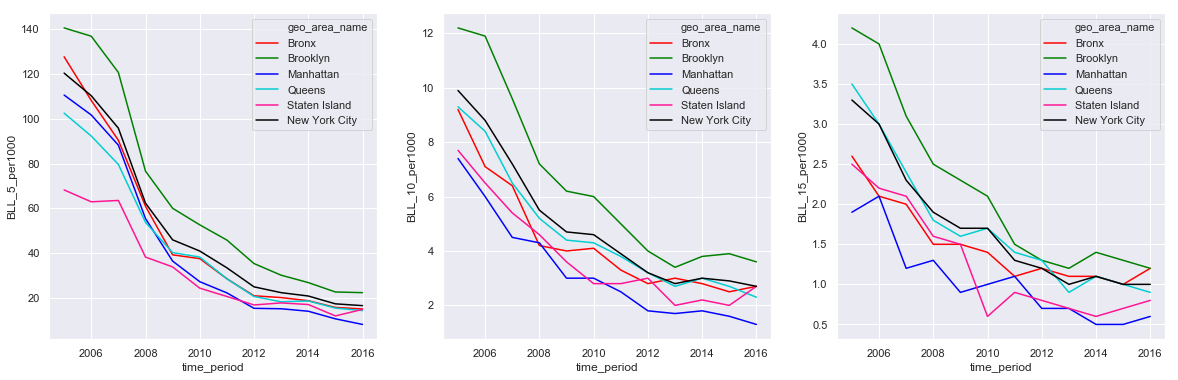

In [52]:
fig, axes = plt.subplots(1,3,figsize=(20,6))
colors = ['red', "green", "blue", "DARKTURQUOISE", 'deeppink', "black"]
#sns.set_palette('husl')
all_areas = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'New York City']
with sns.color_palette(colors):
    sns.lineplot(x='time_period', y='BLL_5_per1000', data=df[df['geo_area_name'].isin(all_areas)], hue='geo_area_name', ax=axes[0])
    sns.lineplot(x='time_period', y='BLL_10_per1000', data=df[df['geo_area_name'].isin(all_areas)], hue='geo_area_name', ax=axes[1])
    sns.lineplot(x='time_period', y='BLL_15_per1000', data=df[df['geo_area_name'].isin(all_areas)], hue='geo_area_name', ax=axes[2])
#fig.tight_layout()

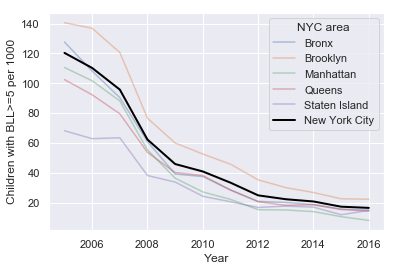

In [53]:
#demostration of highlighting a group among many and setting custom x, y labels and legend
sns.lineplot(x='time_period', y='BLL_5_per1000', data=df[df['geo_area_name'].isin(['Bronx'])], alpha=0.4)
sns.lineplot(x='time_period', y='BLL_5_per1000', data=df[df['geo_area_name'].isin(['Brooklyn'])], alpha=0.4)
sns.lineplot(x='time_period', y='BLL_5_per1000', data=df[df['geo_area_name'].isin(['Manhattan'])], alpha=0.4)
sns.lineplot(x='time_period', y='BLL_5_per1000', data=df[df['geo_area_name'].isin(['Queens'])], alpha=0.4)
sns.lineplot(x='time_period', y='BLL_5_per1000', data=df[df['geo_area_name'].isin(['Staten Island'])], alpha=0.4)
sns.lineplot(x='time_period', y='BLL_5_per1000', data=df[df['geo_area_name'].isin(['New York City'])], linewidth=2, color='black', linestyle='dashed')
plt.xlabel('Year'); plt.ylabel('Children with BLL>=5 per 1000');
plt.legend(title='NYC area', labels=all_areas);

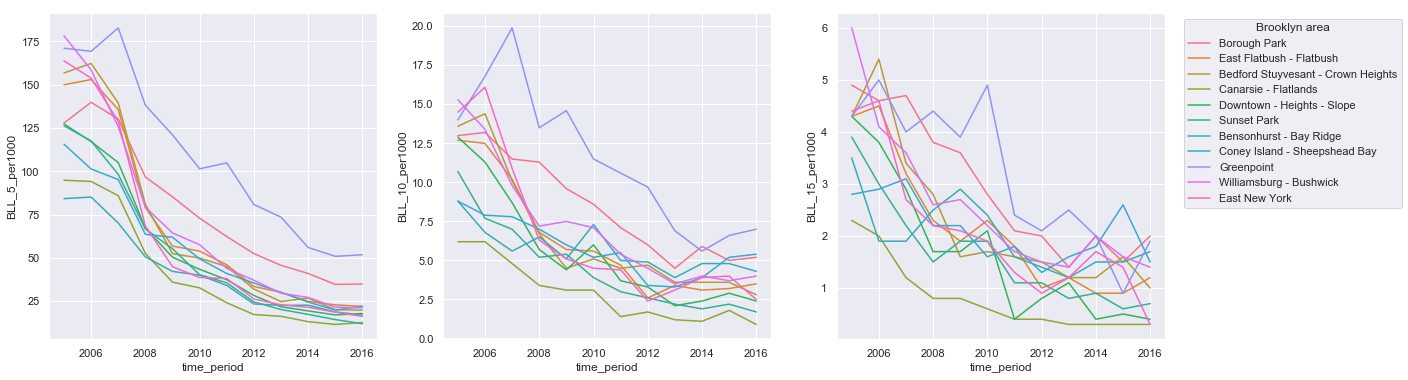

In [54]:
# plot for brooklyn neighborhoods
# subset to all Brooklyn areas
df2 = df[(df['borough_id']==2) & (df['geo_area_name']!='Brooklyn')]
fig, axes = plt.subplots(1,3,figsize=(20, 6))
sns.lineplot(x='time_period', y='BLL_5_per1000', data=df2, hue='geo_area_name', ax=axes[0], legend=None)
sns.lineplot(x='time_period', y='BLL_10_per1000', data=df2, hue='geo_area_name', ax=axes[1], legend=None)
sns.lineplot(x='time_period', y='BLL_15_per1000', data=df2, hue='geo_area_name', ax=axes[2])
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='Brooklyn area', labels=df2['geo_area_name'].unique());

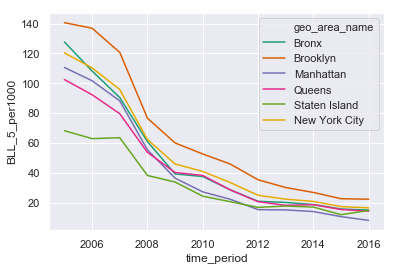

In [55]:
# trying a different color palette
with sns.color_palette('Dark2'):
    sns.lineplot(x='time_period', y='BLL_5_per1000', data=df[df['geo_area_name'].isin(all_areas)], hue='geo_area_name')